# Usage of physico-chemical descriptors for creating a QSAR model for a series of triazole derivates

QSAR techniques are used in this project for obtaining a model between the experimental values of the retention constant (Rmo) for a series of substituted triazoline-3-thiones and a set of descriptors.
The validation of the given model is verified by the coefficient of determination -  R-squared and additional statistical parameters such as PRESS, SSY and Q-squared.

[The quantitative structure–activity relationship (QSAR)](https://en.wikipedia.org/wiki/Quantitative_structure%E2%80%93activity_relationship) is based on the assumption that the activity of a molecule is related to its structure, so that similar molecules have similar activities. QSAR models are regression or classification models used in the chemical and biological sciences and engineering.

The series of disubstituted 1,2,4-triazoline-3-thiones which we will explore are shown below:
![Image of Yaktocat](https://i.imgur.com/JOMRdiy.png)

These compounds offer characteristics which make them attractive in the drug creating research.

Their chromatographic attributes were determined by S. M. Petrović, E. Lončar, N. U. Perišić- Janjić, M. Lazarević - “Normal and reversed-phase thin-layer chromatography of thiourea derivatives“

The values for the retention constants for each given compound are shown in the dataset further below.

### 1) Exploring the dataset

Let's start the project by importing the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

Why we use these libraries:
* [pandas](https://pandas.pydata.org/) is a software library written for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. 
* [numpy](http://www.numpy.org/) is a package in python that is used for scientific computing. It supports higher-order mathematical functions, higher dimensional arrays, matrices and other data structures.
* [statsmodels](https://www.statsmodels.org/stable/index.html) is a Python package that allows users to explore data, estimate statistical models, and perform statistical tests. [statsmodels.formula.api](http://www.statsmodels.org/dev/example_formulas.html) allows users to fit statistical models using R-style formulas.
* [matplotlib](https://matplotlib.org/) is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

We load the dataset which we name 'data':

In [3]:
data = pd.read_excel('...deskriptori.xlsx')

In [3]:
data

,Rmo,miLogP,TPSA,natoms,MW,nON,nOHNH,nrotb,volumen,GPCRL,ICM,KI,NRL,PI,EI
0,0.54,2.569,53.845,19,269.329,4,2,2,228.936,-0.6795,-0.6984,-0.9117,-0.9377,-0.9869,-0.5908
1,0.55,2.333,53.845,19,269.329,4,2,2,228.936,-0.6313,-0.6001,-0.8166,-0.8332,-0.9792,-0.5520
2,0.57,2.357,53.845,19,269.329,4,2,2,228.936,-0.6244,-0.6043,-0.8509,-0.8460,-0.9590,-0.5659
3,0.15,3.223,53.845,20,303.774,4,2,2,242.472,-0.6170,-0.6916,-0.8642,-0.8631,-0.9674,-0.5902
4,0.58,2.307,53.845,20,283.356,4,2,3,245.738,-0.4798,-0.6058,-0.6744,-0.6726,-0.6887,-0.5001
5,0.30,3.219,42.851,22,311.410,4,1,5,280.068,-0.5275,-0.7114,-0.7122,-0.6965,-0.6660,-0.6133
6,0.45,2.418,61.319,25,357.435,6,1,6,314.357,-0.4296,-0.6325,-0.5475,-0.7087,-0.5603,-0.5058
7,0.40,2.732,53.845,17,249.339,4,2,4,224.494,-0.8570,-0.9854,-1.2031,-1.0406,-1.1151,-0.5630
8,0.42,2.496,53.845,17,249.339,4,2,4,224.494,-0.8031,-0.8755,-1.0968,-0.9239,-1.1065,-0.5195
9,0.46,2.520,53.845,17,249.339,4,2,4,224.494,-0.7990,-0.8801,-1.1343,-0.9311,-1.0866,-0.5326


Desriptors in table include:
* Rmo - Retention constant experimental values
* [miLogP](http://www.sirius-analytical.com/science/log-p/log-p-definitions) - Octanol-water partition coefficient logP is used in QSAR studies and rational drug design as a measure of molecular hydrophobicity. Hydrophobicity affects drug absorption, bioavailability, hydrophobic drug-receptor interactions, metabolism of molecules, as well as their toxicity. LogP has become also a key parameter in studies of the environmental fate of chemicals. 
* [TPSA](http://www.molinspiration.com/services/psa.html) - Topological polar surface area (TPSA) of a molecule is defined as the surface sum over all polar atoms, primarily oxygen and nitrogen, also including their attached hydrogen atoms.
* natoms - Number of atoms
* [MW](https://en.wikipedia.org/wiki/Molecular_mass) - Molecular weight is the mass of a molecule. It is calculated as the sum of the atomic weights of each constituent element multiplied by the number of atoms of that element in the molecular formula
* [nON](https://en.wikipedia.org/wiki/Hydrogen_bond) - Hydrogen bonds acceptors are the electronegative atom in a hydrogen bond, not covalently attached to the hydrogen 
* [nOHNH](https://en.wikipedia.org/wiki/Hydrogen_bond) - Hydrogen bonds donors are the electronegative atom in a hydrogen bond, covalently attached to the hydrogen
* [nrotb](http://www.asteris-app.com/technical-info/core-properties/no-rotatable-bonds.htm) - Number of rotatable bonds is the number of bonds which allow free rotation around themselves. These are defined as any single bond, not in a ring, bound to a nonterminal heavy atom. Excluded from the count are amide C–N bonds because of their high rotational energy barrier
* [volumen](http://www.molinspiration.com/services/volume.html) - Molar volume, is the volume occupied by one mole of a substance (chemical element or chemical compound) at a given temperature and pressure
* [GPCRL](https://en.wikipedia.org/wiki/G_protein%E2%80%93coupled_receptor) - GPCR ligand, G protein–coupled receptors (GPCRs), constitute a large protein family of receptors that detect molecules outside the cell and activate internal signal transduction pathways and, ultimately, cellular responses
* [ICM](https://en.wikipedia.org/wiki/Channel_modulator) - Ion Channel Modulators are essentially pore-forming membrane proteins where some drugs may directly or indirectly interact leading to a change in action potentials and other electrical signals across the membrane. 
* [KI](https://en.wikipedia.org/wiki/Protein_kinase_inhibitor) - A protein kinase inhibitor is a type of enzyme inhibitor that can block the action of protein kinases.
* [NPRL](https://en.wikipedia.org/wiki/Nuclear_receptor) - Nuclear receptors are a class of proteins found within cells that are responsible for sensing steroid and thyroid hormones and certain other molecules. In response, these receptors work with other proteins to regulate the expression of specific genes, thereby controlling the development, homeostasis, and metabolism of the organism.
* [PI](https://en.wikipedia.org/wiki/Protease_inhibitor_(biology)) - In biology and biochemistry, protease inhibitors are molecules that inhibit the function of proteases (enzymes that aid the breakdown of proteins). Many naturally occurring protease inhibitors are proteins.
* [EI](https://en.wikipedia.org/wiki/Enzyme_inhibitor) - An enzyme inhibitor is a molecule that binds to an enzyme and decreases its activity. Since blocking an enzyme's activity can kill a pathogen or correct a metabolic imbalance, many drugs are enzyme inhibitors. 

Each row represents the descriptors' values for each compound labeled as 0-10 respectively.

The descriptors are calculated with [Molinspiration Cheminformatics](http://www.molinspiration.com/cgi-bin/properties) - Calculation of Molecular Properties and Bioactivity Score

In [22]:
# data.shape will show us the number of rows and columns in the dataset
data.shape

(11, 20)

Additional information can be displayed

In [5]:
data.describe()

,Rmo,miLogP,TPSA,natoms,MW,nON,nOHNH,nrotb,volumen,GPCRL,ICM,KI,NRL,PI,EI
count,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.421818,2.68700,52.525545,19.545455,282.127182,4.181818,1.727273,3.727273,247.141000,-0.63610,-0.739327,-0.880745,-0.846182,-0.903091,-0.555291
std,0.144763,0.39825,5.276800,2.381749,32.866057,0.603023,0.467099,1.737292,29.950404,0.13860,0.134983,0.200792,0.114624,0.191559,0.037023
min,0.150000,2.30700,42.851000,17.000000,249.339000,4.000000,1.000000,2.000000,224.494000,-0.85700,-0.985400,-1.203100,-1.040600,-1.115100,-0.613300
25%,0.350000,2.38750,53.845000,18.000000,259.334000,4.000000,1.500000,2.000000,226.715000,-0.73925,-0.861500,-1.004250,-0.927500,-1.036750,-0.582600
50%,0.450000,2.52000,53.845000,19.000000,269.329000,4.000000,2.000000,4.000000,228.936000,-0.62440,-0.698400,-0.864200,-0.854600,-0.967400,-0.563000
75%,0.545000,2.97550,53.845000,20.000000,297.597000,4.000000,2.000000,4.500000,260.682000,-0.53820,-0.619150,-0.764400,-0.770950,-0.753500,-0.526050
max,0.580000,3.38300,61.319000,25.000000,357.435000,6.000000,2.000000,7.000000,314.357000,-0.42960,-0.600100,-0.547500,-0.672600,-0.560300,-0.500100


### 2) Obtaining a QSAR model

We can obtain the best linear model by forward selection as the code shown below:

In [3]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

Here's how this function can be applied to our dataset on the retention constant:

In [ ]:
model_Rmo = forward_selected(data, 'Rmo')
print(model_Rmo.model.formula)
print("%.4f" % model_Rmo.rsquared_adj)

When run, it returns the following model:
Rmo ~ miLogP + TPSA + EI + PI + NRL + nON + nOHNH + 1

R-squared_adj = 0.9890

Let's explore some of its parameteres:

In [4]:
model = ols("Rmo ~ miLogP + TPSA + EI + PI + NRL + nON + nOHNH", data=data).fit()

In [5]:
print(model.params)

Intercept    1.708452
miLogP      -0.518425
TPSA        -0.051695
EI          -0.819801
PI           0.581057
NRL         -0.686309
nON          0.349787
nOHNH        0.490777
dtype: float64


Meaning the QSAR model has the following equation:

Rmo = 1.708452 - 0.518425miLog - 0.051695Tpsa - 0.819801EI + 0.581057PI - 0.686309NRL + 0.349787nON + 0.490777nOHNH

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Rmo   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     151.4
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           0.000115
Time:                        22:26:46   Log-Likelihood:                 36.039
No. Observations:                  11   AIC:                            -58.08
Df Residuals:                       4   BIC:                            -55.29
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7085      0.133     12.840      0.0

We can calculate some additional statistical parameters like:
* [PRESS](https://en.wikipedia.org/wiki/PRESS_statistic) - Predicted residual error sum of squares
* [SSY](http://itfeature.com/statistics/sum-of-squared-deviation) - Sum of squares of deviation of the experimental values from their mean
* Q-squared (Cross-validation squared correlation coefficient) = 1 - PRESS/SSY.

We will create new columns in our dataset by using the bellow-mentioned functions in order to calculate the additional parameters

In [5]:
def equation(a, b, c, d, e, f, g):
    return pd.Series([1.708452 - 0.518425*a - 0.051695*b - 0.819801*c + 0.581057*d - 0.686309*e + 0.349787*f + 0.490777*g])
def subtraction(a, b):
    return pd.Series([a - b])
def square(a):
    return pd.Series([a**2])

In [6]:
data[['Rmo_model']] = data.apply(lambda x: equation(x['miLogP'], x['TPSA'], x['EI'], x['PI'], x['NRL'], x['nON'], x['nOHNH']), axis=1)
data[['Rmo-Rmo_model']] = data.apply(lambda x: subtraction(x['Rmo_model'], x['Rmo'],), axis=1)
data[['Rmo-Rmo_model_square']] = data.apply(lambda x: square(x['Rmo-Rmo_model']), axis=1)
data[['Rmo_substract']] = data.apply(lambda x: subtraction(x['Rmo'], data["Rmo"].mean()), axis=1)
data[['Rmo_substract_square']] = data.apply(lambda x: square(x['Rmo_substract']), axis=1)

Let's review the values of the new columns:

In [8]:
data.iloc[0:,15:21]

,Rmo_model,Rmo-Rmo_model,Rmo-Rmo_model_square,Rmo_substract,Rmo_substract_square
0,0.528248,-0.011752,1.381065e-04,0.118182,0.013967
1,0.551543,0.001543,2.380838e-06,0.128182,0.016431
2,0.571018,0.001018,1.036603e-06,0.148182,0.021958
3,0.148838,-0.001162,1.349648e-06,-0.271818,0.073885
4,0.581050,0.001050,1.102936e-06,0.158182,0.025021
5,0.308199,0.008199,6.721851e-05,-0.121818,0.014840
6,0.449990,-0.000010,1.011634e-10,0.028182,0.000794
7,0.417084,0.017084,2.918655e-04,-0.021818,0.000476
8,0.428676,0.008676,7.527053e-05,-0.001818,0.000003
9,0.443478,-0.016522,2.729926e-04,0.038182,0.001458


In [9]:
PRESS = data['Rmo-Rmo_model_square'].values.sum()
SSY = data['Rmo_substract_square'].values.sum()
PRESS_SSY = PRESS/SSY
Q2 = 1 - PRESS_SSY

In [10]:
print('The values of the additional statistical parameters are:\n' + 'PRESS = ' + str("%.4f" % PRESS) + '\nSSY = ' + str("%.4f" % SSY) + '\nPRESS_SSY = ' + str("%.4f" % PRESS_SSY) + '\nQ2 = ' + str("%.4f" % Q2))

The values of the additional statistical parameters are:
PRESS = 0.0009
SSY = 0.2096
PRESS_SSY = 0.0044
Q2 = 0.9956


Visualising the correlation between the experimental Rmo values and the predicted (modeled) Rmo values can be done the following way:

Text(0,0.5,'Rmo_model')

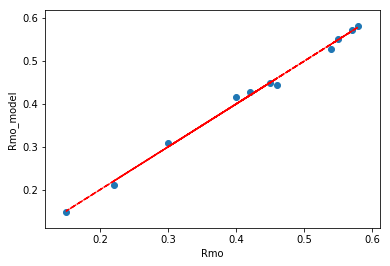

In [10]:
x = data['Rmo']
y = data['Rmo_model']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plot = plt.plot(x,p(x),"r--")

plt.xlabel("Rmo")
plt.ylabel("Rmo_model")

In [8]:
R_value = smf.OLS(x, y).fit()

In [9]:
R_value.rsquared

0.9995759911534654